In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import scipy.special as special

plt.style.use('seaborn-darkgrid')

In [2]:
p = pd.DataFrame({
    'A': [0, 0, 10, 0, 0],
    'B': [0, 1, 8, 1, 0],
    'C': [0, 2, 6, 2, 0],
    'D': [1, 2, 4, 2, 1], 
    'E': [2, 2, 2, 2, 2]
})
p / p.sum(axis=0)

,A,B,C,D,E
0,0.0,0.0,0.0,0.1,0.2
1,0.0,0.1,0.2,0.2,0.2
2,1.0,0.8,0.6,0.4,0.2
3,0.0,0.1,0.2,0.2,0.2
4,0.0,0.0,0.0,0.1,0.2


In [3]:
stats.entropy(p, axis=0)

array([0.        , 0.63903186, 0.95027054, 1.47080848, 1.60943791])

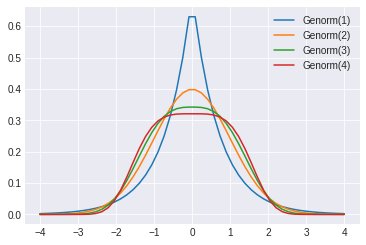

In [4]:
x = np.linspace(-4, 4, 50)
for b in [1,2,3,4]:
    plt.plot(x, stats.gennorm.pdf(x, b, scale=np.sqrt(special.gamma(1/b) / special.gamma(3/b))), label=f"Genorm({b})")
plt.legend()

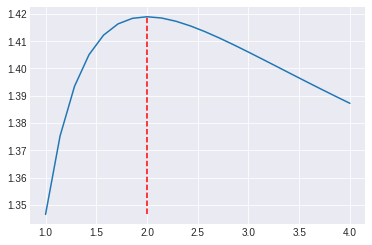

In [5]:
ks = np.linspace(1, 4, 22)
ek = np.zeros(22)
for k in range(len(ks)):
    ek[k] = stats.gennorm.entropy(ks[k], scale=np.sqrt(special.gamma(1/ks[k]) / special.gamma(3/ks[k])))
plt.plot(ks, ek)
idx = np.argmax(ek)
plt.vlines(ks[idx], np.amin(ek), np.amax(ek), linestyles='dashed', color='r')

In [6]:
p = np.array([
    [1/4, 1/4, 1/4, 1/4], 
    [2/6, 1/6, 1/6, 2/6],
    [1/6, 2/6, 2/6, 1/6],
    [1/8, 4/8, 2/8, 1/8]
])
c = np.array([0, 1, 1, 2])
p@c

array([1., 1., 1., 1.])

In [7]:
stats.entropy(p, axis=1)

array([1.38629436, 1.32966135, 1.32966135, 1.21300757])

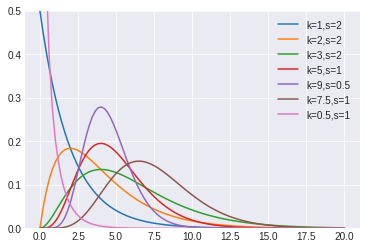

In [22]:
k = [1,2,3,5,9,7.5, 0.5]
s = [2, 2, 2, 1, 0.5, 1, 1]
x = np.linspace(0,20,100)
for kk, ss in zip(k, s):
    plt.plot(x, stats.gamma.pdf(x, kk, scale=ss), label=f"k={kk},s={ss}")
plt.ylim(0, 0.5)
plt.legend(loc='upper right')